## Overview

This project will use PyAutoGUI to take in data from user mouse movement, the average direction will be calculated, then the projected mouse movement will be used to control the mouse for the user.

#### Libraries

In [ ]:
#only run this on your first time using the code...
#NOTE: They need to be installed locally on your computer
#pip install pyautogui
#pip install keyboard

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pyautogui
import time
import keyboard
import multiprocessing
import csv
import tkinter
from tkinter import *

### Overarching Variables

In [2]:
xCoordinate, yCoordinate = pyautogui.size()

screenHalfWidth = xCoordinate / 2
screenHalfHeight = yCoordinate / 2

windowHalfWidth = 200
windowHalfHeight = 125
xLocation = screenHalfWidth - windowHalfWidth
yLocation = screenHalfHeight - windowHalfHeight


### Define Cursor Movement Functions

In [3]:
def bottomLeft():
    moveX = 20
    moveY = yCoordinate - 20
    pyautogui.moveTo(moveX, moveY)
    
def bottomRight():
    moveX = xCoordinate - 20
    moveY = yCoordinate - 20
    pyautogui.moveTo(moveX, moveY)
    
def upperLeft():
    moveX = 20
    moveY = 20
    pyautogui.moveTo(moveX,moveY)
    
def upperRight():
    moveX = xCoordinate - 20
    moveY = 20
    pyautogui.moveTo(moveX, moveY)
    
def middleLeft():
    moveX = 20
    moveY = yCoordinate / 2
    pyautogui.moveTo(moveX, moveY)

def middleRight():
    moveX = xCoordinate - 20
    moveY = yCoordinate / 2
    pyautogui.moveTo(moveX, moveY)

def middleBottom():
    moveX = xCoordinate / 2
    moveY = yCoordinate - 20
    pyautogui.moveTo(moveX, moveY)
    
def middleTop():
    moveX = xCoordinate / 2
    moveY = 20
    pyautogui.moveTo(moveX, moveY)


### Pop-up Box Function

In [4]:
def createPopUp(message):    
    #Define window & text
    window = Tk()
    window.title("Cursor Movement Data Collection")
    window.configure(background="#EEEEEE")
    lbl = Label(window, text=message, bg="#EEEEEE", wraplength=500, justify=CENTER, fg="#555555", font="Times 30").pack()
    
    #Define button
    btn = Button(window, text="Click Me", command=window.destroy,\
                 bg="red", font="Times 50 bold").pack()
    
    #Set dimensions and location
    window.geometry("%dx%d+%d+%d" % (700, 250, xLocation, yLocation))
    
    #declare thread that tracks cursor movement
    stopCondition = multiprocessing.Value('i', 0)
    p1 = multiprocessing.Process(target=trackCursor, args=(stopCondition, ))
    p1.start()
    
    window.mainloop()
    
    stopCondition.value = 1
    
    p1.join()

### Tracking Cursor Movement

In [5]:
def trackCursor(stopCondition):
    xCoordinateList = []
    yCoordinateList = []
    while(stopCondition.value is not 1):
        currentMouseX, currentMouseY = pyautogui.position() # Returns two integers, the x and y of the mouse cursor's current position.
        xCoordinateList.append(currentMouseX)
        yCoordinateList.append(currentMouseY)
        time.sleep(0.2)
        
    global fileName
    
    for coordinate in xCoordinateList:
        print(coordinate)
        
    print("\n")
    
    for coordinate in yCoordinateList:
        print(coordinate)
    

### Storing Movement in CSV

In [6]:
def storeData(xCoordinateData, yCoordinateData):
    fuck = True

### Individual Calibration Functions

In [7]:
def runCalibrationBL(iterations):
    global fileName
    fileName = "bottomLeftData.csv"
    
    count = 0
    while(count < iterations):
        bottomLeft()
        message = "Move cursor from bottom left corner of your screen"
                
        createPopUp(message)
        
        count += 1

def runCalibrationBR(iterations):
    global fileName
    fileName = "bottomRightData.csv"
    
    count = 0
    while(count < iterations):
        bottomRight()
        #trackCursor()
        message = "Move cursor from bottom right corner of your screen"
        createPopUp(message)
        
        count += 1
        
def runCalibrationUL(iterations):        
    global fileName
    fileName = "upperLeftData.csv"
    
    count = 0
    while(count < iterations):
        upperLeft()
        #trackCursor()
        message = "Move cursor from upper left corner of your screen"
        createPopUp(message)
        
        count += 1

def runCalibrationUR(iterations):
    global fileName
    fileName = "upperRightData.csv"
    
    count = 0
    while(count < iterations):
        upperRight()
        #trackCursor()
        message = "Move cursor from upper right corner of your screen"
        createPopUp(message)
        
        count += 1

def runCalibrationML(iterations):
    global fileName
    fileName = "middleLeftData.csv"
    
    count = 0
    while(count < iterations):
        middleLeft()
        #trackCursor()
        message = "Move cursor from the middle of the left side of your screen"
        createPopUp(message)
        
        count += 1

def runCalibrationMR(iterations):
    global fileName
    fileName = "middleRightData.csv"
    
    count = 0
    while(count < iterations):
        middleRight()
        #trackCursor()
        message = "Move cursor from the middle of the right side of your screen"
        createPopUp(message)
        
        count += 1

def runCalibrationMT(iterations):
    global fileName
    fileName = "middleTopData.csv"
    
    count = 0
    while(count < iterations):
        middleTop()
        #trackCursor()
        message = "Move cursor from the middle of the top side of your screen"
        createPopUp(message)
        
        count += 1

def runCalibrationMB(iterations):
    global fileName
    fileName = "middleBottomData.csv"
    
    count = 0
    while(count < iterations):
        middleBottom()
        #trackCursor()
        message = "Move cursor from the middle of the bottom side of your screen"
        createPopUp(message)
        
        count += 1

### Collect User Mouse Data

In [8]:
runCalibrationBL(1)

20
20
20
20
20
20
20
24
178
288
403
456
505
549
1026
1323
1431
1656
2054
2141
2161
2179
2201
2204
2204


1079
1079
1079
1079
1079
1079
1078
1079
1079
1060
1006
918
904
897
708
575
642
743
811
813
849
899
948
955
955


In [9]:
runCalibrationBR(1)

In [10]:
runCalibrationMB(1)

In [11]:
runCalibrationUL(1)

In [12]:
runCalibrationMT(1)

In [8]:
runCalibrationMR(1)

3820
3820
3820
3820
3820
3812
3656
3288
2863
2549
2448
2380
2369


925
925
925
925
925
897
771
801
858
920
958
984
989


In [ ]:
runCalibrationML(1)

In [ ]:
runCalibrationUR(1)

### Graphing

In [9]:
bottomLeft_df = pd.read_csv('bottomLeftData.csv')

In [10]:
user1X = bottomLeft_df['user1X']
user1Y = bottomLeft_df['user1Y']

user2X = bottomLeft_df['user2X']
user2Y = bottomLeft_df['user2Y']

user3X = bottomLeft_df['user3X']
user3Y = bottomLeft_df['user3Y']

KeyError: 'user2X'

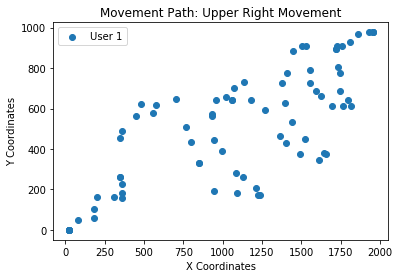

In [12]:
plt.title("Movement Path: Upper Right Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.scatter(user1X, user1Y, label='User 1')
# plt.scatter(user2X, user2Y, label='User 2')
# plt.scatter(user3X, user3Y, label='User 3')
plt.legend()
plt.show()

In [10]:
bottomRight_df = pd.read_csv('bottomRightData.csv')

user1X = bottomRight_df['user1X']
user1Y = bottomRight_df['user1Y']

# user2X = bottomRight_df['user2X']
# user2Y = bottomRight_df['user2Y']

# user3X = bottomRight_df['user3X']
# user3Y = bottomRight_df['user3Y']

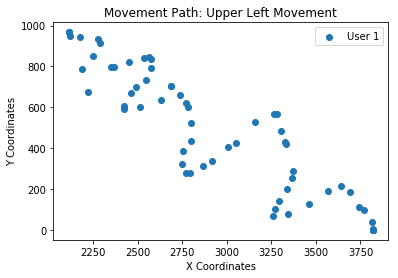

In [11]:
plt.title("Movement Path: Upper Left Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.scatter(user1X, user1Y, label='User 1')
# plt.scatter(user2X, user2Y, label='User 2')
# plt.scatter(user3X, user3Y, label='User 3')
plt.legend()
plt.show()

In [9]:
middleBottom_df = pd.read_csv('middleBottom.csv')

user1X = middleBottom_df['user1X']
user1Y = middleBottom_df['user1Y']

# user2X = middleBottom_df['user2X']
# user2Y = middleBottom_df['user2Y']

# user3X = middleBottom_df['user3X']
# user3Y = middleBottom_df['user3Y']

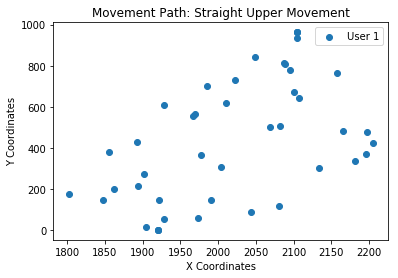

In [10]:
plt.title("Movement Path: Straight Upper Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.scatter(user1X, user1Y, label='User 1')
# plt.scatter(user2X, user2Y, label='User 2')
# plt.scatter(user3X, user3Y, label='User 3')
plt.legend()
plt.show()

In [11]:
middleBottom_df = pd.read_csv('upperLeftData.csv')

user1XMB = middleBottom_df['user1X']
user1YMB = middleBottom_df['user1Y']

user2XMB = middleBottom_df['user2X']
user2YMB = middleBottom_df['user2Y']

user3XMB = middleBottom_df['user3X']
user3YMB = middleBottom_df['user3Y']

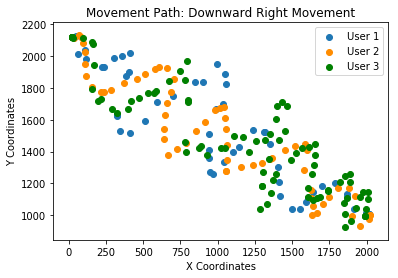

In [12]:
plt.title("Movement Path: Downward Right Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.scatter(user1XMB, user1YMB, label='User 1')
plt.scatter(user2XMB, user2YMB, label='User 2', c='darkorange')
plt.scatter(user3XMB, user3YMB, label='User 3', c='green')
plt.legend()
plt.show()

In [19]:
middleTop_df = pd.read_csv('middleTopData.csv')

user1XMT = middleTop_df['user1X']
user1YMT = middleTop_df['user1Y']

user2XMT = middleTop_df['user2X']
user2YMT = middleTop_df['user2Y']

user3XMT = middleTop_df['user3X']
user3YMT = middleTop_df['user3Y']

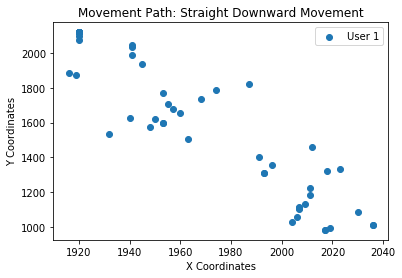

In [20]:
plt.title("Movement Path: Straight Downward Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.scatter(user1XMT, user1YMT, label='User 1')
#plt.scatter(user2XMT, user2YMT, label='User 2')
#plt.scatter(user3XMT, user3YMT, label='User 3')
plt.legend()
plt.show()

In [29]:
middleRight_df = pd.read_csv('middleRightData.csv')

user1XMR = middleRight_df['user1X']
user1YMR = middleRight_df['user1Y']

user2XMR = middleRight_df['user2X']
user2YMR = middleRight_df['user2Y']

user3XMR = middleRight_df['user3X']
user3YMR = middleRight_df['user3Y']

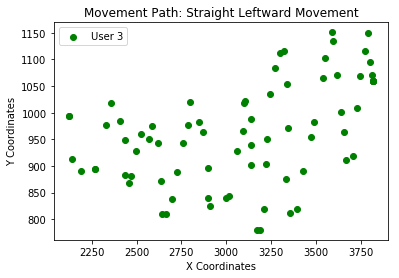

In [32]:
plt.title("Movement Path: Straight Leftward Movement")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
#plt.scatter(user1XMR, user1YMR, label='User 1')
#plt.scatter(user2XMR, user2YMR, label='User 2', c='darkorange')
plt.scatter(user3XMR, user3YMR, label='User 3', c='green')
plt.legend()
plt.show()